In [3]:
from surprise import Dataset

In [4]:
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\Dicsys/.surprise_data/ml-100k


In [8]:
data.raw_ratings

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013'),
 ('62', '257', 2.0, '879372434'),
 ('286', '1014', 5.0, '879781125'),
 ('200', '222', 5.0, '876042340'),
 ('210', '40', 3.0, '891035994'),
 ('224', '29', 3.0, '888104457'),
 ('303', '785', 3.0, '879485318'),
 ('122', '387', 5.0, '879270459'),
 ('194', '274', 2.0, '879539794'),
 ('291', '1042', 4.0, '874834944'),
 ('234', '1184', 2.0, '892079237'),
 ('119', '392', 4.0, '886176814'),
 ('167', '486', 4.0, '892738452'),
 ('299', '144', 4.0, '877881320'),
 ('291', '118', 2.0, '874833878'),
 ('308', '1', 4.0, '887736532'),
 ('95', '546', 2.0, '879196566'),
 ('38', '95', 5.0, '892430094'),
 ('102', '768', 2.0, '883748450'),
 ('63', '277', 4.0, '875747401

__2) Ejecutar una corrida inicial usando cross validation y el algoritmo SVD (5 folds). Imprimir los RMSE de testing.__

In [6]:
from surprise import SVD
from surprise import KNNBasic
from surprise.model_selection import cross_validate

algo = KNNBasic()
cv = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9799  0.9775  0.9850  0.9761  0.9761  0.9789  0.0033  
MAE (testset)     0.7739  0.7710  0.7788  0.7711  0.7690  0.7728  0.0034  
Fit time          0.47    0.50    0.49    0.48    0.63    0.52    0.06    
Test time         2.99    3.26    3.13    3.65    4.36    3.48    0.49    


In [9]:
import numpy as np
rmse_test_means = []

factors = [5,100,200]
for factor in factors:
    algo = SVD(n_factors=factor)
    cv = cross_validate(algo, data, measures=['RMSE'],  cv=3, verbose=False)
    rmse_test_means.append(np.mean(cv['test_rmse']))

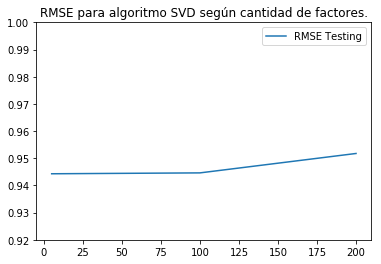

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(factors, rmse_test_means, label='RMSE Testing')
plt.ylim((0.92, 1.0))
plt.legend(loc="best")
plt.title("RMSE para algoritmo SVD según cantidad de factores.")
plt.show()

### Evaluación

In [11]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import GridSearchCV

data = Dataset.load_builtin('ml-100k')

param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9640141579802162
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}
